In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def root_mean_squared_error(true, pred):
    mean_squared_error = np.mean((true - pred)**2)
    return (mean_squared_error)**(1/2)

def scale_stds(std, df):
    scaled_std = std * np.std(np.array(df['yield'])) + np.mean(np.array(df['yield']))
    return scaled_std

def plot_gp(test_labels, preds, scaled_std):
    plt.errorbar(test_labels, preds, yerr=scaled_std, fmt='.')
    plt.plot([0,100],[0,100], color='gray', label='Perfect')
    plt.title('Gaussian Process Regression of Yields')
    plt.xlabel('True Yields')
    plt.ylabel('Predicted Yields')
    plt.legend()
    return plt.show()

In [4]:
df = pd.read_csv('doyle.csv')
df

,plate,row,col,base,base_cas_number,base_smiles,ligand,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
0,1,1,1,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,1.0,1-chloro-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Cl)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,26.888615
1,1,1,2,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,2.0,1-bromo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Br)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,24.063224
2,1,1,3,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,3.0,1-iodo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(I)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,47.515821
3,1,1,4,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,4.0,1-chloro-4-methoxybenzene,COc1ccc(Cl)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,2.126831
4,1,1,5,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,5.0,1-bromo-4-methoxybenzene,COc1ccc(Br)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,47.586354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,3,32,44,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,12.0,2-iodopyridine,Ic1ccccn1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2ccccn2)cc1,86.233157
4595,3,32,45,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,13.0,3-chloropyridine,Clc1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,1.440081
4596,3,32,46,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,14.0,3-bromopyridine,Brc1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,43.538365
4597,3,32,47,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,15.0,3-iodopyridine,Ic1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,69.795902


In [5]:
rxn_fps = np.load('rxn_fps_inputs.npy')

In [6]:
rxn_fps = StandardScaler().fit_transform(rxn_fps)

In [7]:
labels = np.array(df['yield'])

In [8]:
gp = GaussianProcessRegressor(kernel=Matern())

In [9]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
rxn_fps,
labels,
test_size=0.01,
random_state=12)

In [10]:
gp.fit(train_inputs, train_labels)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5))

In [11]:
preds, std = gp.predict(test_inputs, return_std=True)

In [12]:
preds

array([3.09009433e+01, 1.64494475e+01, 2.22467978e+01, 1.76370191e+01,
       2.81652118e+01, 8.99469876e-17, 1.22876608e-16, 8.09399962e+01,
       3.17682504e+01, 1.05857552e-17, 5.12255057e+01, 4.24916749e+01,
       2.58284510e-16, 3.79902657e+00, 2.92874469e+01, 1.22463960e+01,
       5.74645495e+01, 1.72578285e+01, 4.27974423e+01, 3.75160614e+01,
       9.59889068e+01, 4.74132764e+01, 1.11297241e+01, 1.74855216e+01,
       6.11409072e-01, 4.52681220e+01, 9.44493204e-01, 1.12016747e+01,
       3.37372960e+01, 3.66850020e+00, 6.25295171e+00, 2.44469647e+01,
       5.28445745e-17, 2.23444017e+01, 7.45967379e+01, 3.15332129e+01,
       2.67760505e+01, 5.16534146e+01, 3.39881375e+01, 2.34318174e+01,
       2.14261022e-01, 4.35996190e+01, 3.41619399e+01, 1.10524688e+01,
       8.21238660e+01, 2.95885915e+01])

In [13]:
std

array([0.73431055, 0.83921982, 0.65818329, 0.73149279, 0.59564849,
       0.95184281, 0.99361142, 0.50877611, 0.36202123, 0.70351641,
       0.73944579, 0.60923406, 0.99993349, 0.63916533, 0.70834291,
       0.7291476 , 0.49306185, 0.46168213, 0.36322248, 0.86921056,
       0.68634572, 0.57765132, 0.78277533, 0.87563531, 0.59115717,
       0.55123399, 0.52521268, 0.58288375, 0.80462297, 0.8470822 ,
       0.80372201, 0.97353413, 0.85388198, 0.74841599, 0.79534585,
       0.28437333, 0.98875822, 0.86420521, 0.3498595 , 0.75198841,
       0.93715551, 0.76098489, 0.78969396, 0.61536329, 0.79985044,
       0.73040833])

In [14]:
scaled_std = scale_stds(std, df)

In [15]:
scaled_std

array([51.2594705 , 54.17267283, 49.1455093 , 51.18122472, 47.40899423,
       57.30007597, 58.45993941, 44.99665445, 40.9214504 , 50.40435488,
       51.40206981, 47.78624905, 58.6354955 , 48.61740388, 50.53838072,
       51.11610181, 44.56028847, 43.68891208, 40.95480765, 55.00547933,
       49.92754579, 46.90923477, 52.60527837, 55.18388653, 47.28427596,
       46.17565778, 45.4530777 , 47.054533  , 53.21196075, 54.39100177,
       53.18694205, 57.90241738, 54.57982335, 51.6511613 , 52.9543464 ,
       38.76526284, 58.32517196, 54.86648679, 40.58373404, 51.75036316,
       56.89222744, 52.00018452, 52.79740024, 47.95645014, 53.07943343,
       51.15111076])

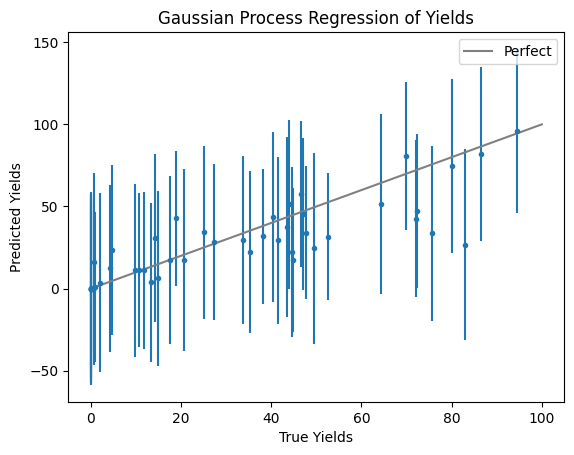

In [16]:
plot_gp(test_labels, preds, scaled_std)

In [17]:
root_mean_squared_error(test_labels, preds)

15.90102035508691

In [18]:
mean_absolute_error(test_labels, preds)

10.460763587678503

In [19]:
r2_score(test_labels, preds)

0.6769613585178806